TIPOS DE ANÁLISIS

- **Inspección general** del dataset: tamaño, nombre de variables, tipo, etc.

- **Análisis** para los diferentes tipos de **variables**:
    - **Análisis Univariable**: su objetivo principal es describir y resumir los datos de una sóla variable y entender su distribución y tendencias para identificar patrones, valores atípicos y características como media, moda, varianza, etc.


    - **Análisis Bivariable**: su objetivo permite entender cómo dos variables se relacionan entre sí, pudiendo identificar correlaciones, tendencias y posibles causas y efectos.

    - **Análisis Multivariable**: su objetivo es entender las relaciones e interaciones entre tres o más variables en un conjunto de datos. Se utiliza para identificar patrones, tendencias y correlaciones entre variables, así como para construir modelos que permitan predecir el comportamiento de una variable en función de otras.

ANÁLISIS DEPENDIENDO DEL TIPO DE VARIABLE

Los análisis univariables, bivariables y multivariables usan diferentes técnicas dependiendo del tipo de variables: numéricas y categóricas:

- Variables Numéricas:
    - Análisis Univariable:
        - Histogramas (histplot): distribución de una variable, Divide los datos en intervalos (bins) y cuenta cuántos valores caen en cada uno. Representa la distribución de frecuencias de una variable numérica.

        - Boxplots (boxplot): distribucción, incluye mediana y valores atipicos
        - Violinplots: podemos ver la distribucción(histograma), incluye mediana y valores atipicos, la caja y bigotes (boxplot)
        - Descriptivos
    - Análisis Bivariable:
        - Gráficos de dispersión (scatterplot)
        - Regresión (Reg plot)
        - Coeficientes correlación (Matriz de correlación)
    

- Variables Categóricas
    - Análisis Univariable:
      - Conteo de frecuencias (countplot): con graficos de barras muestra la frecuencia de cada categoría de la variable categórica. Es lo mimos que un histograma
      - Porcentaje o proporciones (pieplot): 
    - Análisis Bivariable:
      - Countplot
      -  Grafico de barras (bar): (es como un conteo), pero le tenemos que espeificar los valores x (categorias) y los valores y (numeros). No calcula
      -  Tablas de contigencia

- Relación variables categóricas y numéricas
  - Boxplot
  - Barplot: muestra la media de una variable categóricoa


In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("./files/bank-additional-clean-nonulls.csv") 
df['marital'] = df['marital'].replace({'noviembre': 'married'})

In [3]:
df.head()

,Unnamed: 0,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,age,euribor3m,pdays
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,40.005436,4.857000,4.4
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,noviembre,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,57.000000,3.603174,4.8
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,37.000000,4.857000,7.0
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,40.000000,3.595488,2.8
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,56.000000,3.602722,5.8


## Visualización Variables Categóricas

### Análisis univariable - Conteo de valores o frecuencias 

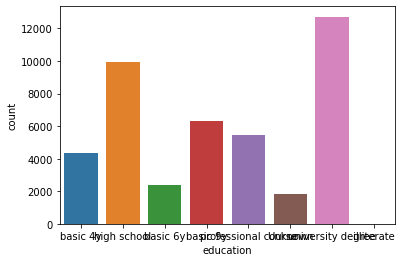

In [5]:
sns.countplot(x="education", data=df);

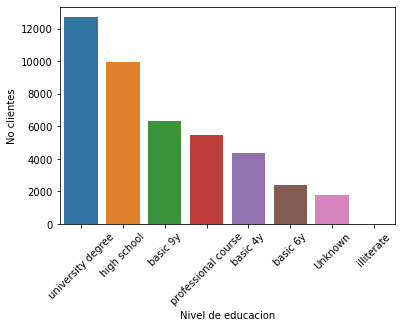

In [12]:
order_education = df['education'].value_counts().index
order_education

sns.countplot(x="education", data=df, order=order_education);
plt.xticks(rotation=45);
plt.xlabel("Nivel de educacion")
plt.ylabel("No clientes")

plt.show()

- La mayoria de los clientes tienen grado universitario, y muy cerca tendriamos a los de instituto. 

### Análisis univariable - Porcentajes o proporciones
- Preparación de datos
- Visualización

In [13]:
#¿cantidad de clientes por grado universitario?

df_education = df.groupby('education')["id"].count().reset_index()
df_education


,education,id
0,Unknown,1807
1,basic 4y,4356
2,basic 6y,2386
3,basic 9y,6309
4,high school,9925
5,illiterate,18
6,professional course,5477
7,university degree,12722


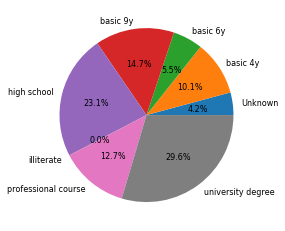

In [16]:
plt.pie("id", labels="education", data=df_education, textprops={'fontsize': 8}, autopct='%1.1f%%');

### Análisis bivariable - Countplot con hue

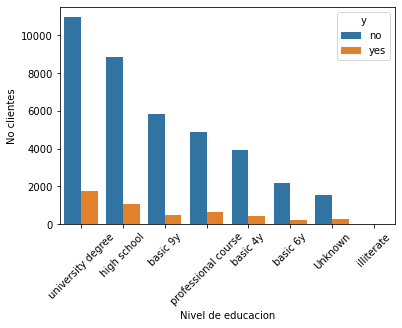

In [19]:
order_education = df['education'].value_counts().index
order_education

sns.countplot(x="education", data=df, order=order_education, hue="y");

plt.xticks(rotation=45);
plt.xlabel("Nivel de educacion")
plt.ylabel("No clientes")

plt.show()

### Análisis bivariable - Tablas contingencia

In [ ]:
pd.crosstab?


In [20]:
crosstab_result = pd.crosstab(df['education'], df['y'])
crosstab_result

y,no,yes
education,,
Unknown,1546,261
basic 4y,3908,448
basic 6y,2192,194
basic 9y,5816,493
high school,8849,1076
illiterate,14,4
professional course,4857,620
university degree,10974,1748


## Relaciones entre variables categóricas y numéricas -> Resumen de estadísticos

- countplot = Gráfico de conteo (categórico).
- barplot = Gráfico de barras que muestra una estadística resumida (como la media) de una variable numérica para cada categoría.

Text(0.5, 0.98, 'Comparacion nivel educativo e ingresos')

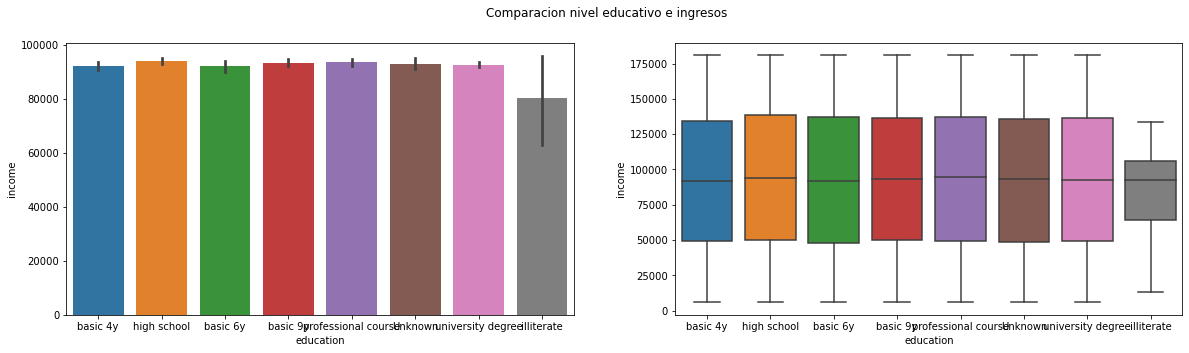

In [ ]:
fig,axes = plt.subplots(nrows= 1, ncols=2, figsize= (20, 5))

sns.barplot(x="education", y="income", data=df, ax=axes[0]);

sns.boxplot(x="education", y="income", data=df, ax=axes[1]) ;

plt.suptitle("Comparacion nivel educativo e ingresos")



#### Interpretación de las visualizaciones

- Barplot
  - En Seaborn, un barplot muestra barras verticales cuya altura representa una estadística agregada (por defecto, la media) de la variable numérica.